In [1]:
import os
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import cv2
import timeit

In [3]:
filepath = Path('/home/aditya/yolov3/data/label_kitti/training/label_2')

In [4]:
exp_filepath = filepath / '000008.txt'
exp_filepath.open().read()

'Car 0.88 3 -0.69 0.00 192.37 402.31 374.00 1.60 1.57 3.23 -2.70 1.74 3.68 -1.29\nCar 0.00 1 2.04 334.85 178.94 624.50 372.04 1.57 1.50 3.68 -1.17 1.65 7.86 1.90\nCar 0.34 3 -1.84 937.29 197.39 1241.00 374.00 1.39 1.44 3.08 3.81 1.64 6.15 -1.31\nCar 0.00 1 -1.33 597.59 176.18 720.90 261.14 1.47 1.60 3.66 1.07 1.55 14.44 -1.25\nCar 0.00 0 1.74 741.18 168.83 792.25 208.43 1.70 1.63 4.08 7.24 1.55 33.20 1.95\nCar 0.00 0 -1.65 884.52 178.31 956.41 240.18 1.59 1.59 2.47 8.48 1.75 19.96 -1.25\nDontCare -1 -1 -10 800.38 163.67 825.45 184.07 -1 -1 -1 -1000 -1000 -1000 -10\nDontCare -1 -1 -10 859.58 172.34 886.26 194.51 -1 -1 -1 -1000 -1000 -1000 -10\nDontCare -1 -1 -10 801.81 163.96 825.20 183.59 -1 -1 -1 -1000 -1000 -1000 -10\nDontCare -1 -1 -10 826.87 162.28 845.84 178.86 -1 -1 -1 -1000 -1000 -1000 -10\n'

In [9]:
def parse_label_feature(s):
    pairs = s.strip().split('\n')
    pairs = [i.split(' ') for i in pairs]
    return pairs

In [6]:
sample_label_list = parse_label_feature(exp_filepath.open().read())
type(sample_label_list[1]),sample_label_list[1]

(list,
 ['Car',
  '0.00',
  '1',
  '2.04',
  '334.85',
  '178.94',
  '624.50',
  '372.04',
  '1.57',
  '1.50',
  '3.68',
  '-1.17',
  '1.65',
  '7.86',
  '1.90'])

In [7]:
label_df1 = pd.DataFrame(data = sample_label_list, index = None)
label_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Car,0.88,3,-0.69,0.00,192.37,402.31,374.00,1.60,1.57,3.23,-2.70,1.74,3.68,-1.29
1,Car,0.00,1,2.04,334.85,178.94,624.50,372.04,1.57,1.50,3.68,-1.17,1.65,7.86,1.90
2,Car,0.34,3,-1.84,937.29,197.39,1241.00,374.00,1.39,1.44,3.08,3.81,1.64,6.15,-1.31
3,Car,0.00,1,-1.33,597.59,176.18,720.90,261.14,1.47,1.60,3.66,1.07,1.55,14.44,-1.25
4,Car,0.00,0,1.74,741.18,168.83,792.25,208.43,1.70,1.63,4.08,7.24,1.55,33.20,1.95


In [8]:
def parse_label_count(s):
    pairs = s.strip().split('\n')
    obj_count = len(pairs)
    return obj_count

In [9]:
max_iterations = 7480

k = []
label_name = []
for x in list(filepath.glob('*.txt'))[:max_iterations]:
  k = parse_label_count(x.open().read())
  f = x.name.replace('.txt','')
  label_name += [f]*k 

print(len(label_name))

51861


In [10]:
max_iterations = 7480

label_df = []
for x in list(filepath.glob('*.txt'))[:max_iterations]:
  label_df += (parse_label_feature(x.open().read()))

print(len(label_df))

51861


In [11]:
label_df[0:2]

[['Car',
  '0.00',
  '1',
  '-2.71',
  '154.99',
  '189.05',
  '338.18',
  '256.17',
  '1.44',
  '1.52',
  '3.50',
  '-8.43',
  '1.84',
  '16.84',
  '3.12'],
 ['Car',
  '0.00',
  '2',
  '-2.79',
  '268.32',
  '182.39',
  '399.87',
  '237.25',
  '1.59',
  '1.52',
  '3.47',
  '-8.48',
  '1.91',
  '22.26',
  '3.13']]

In [12]:
label_df1 = pd.DataFrame(data = label_df, index = label_name )
label_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
003436,Car,0.00,1,-2.71,154.99,189.05,338.18,256.17,1.44,1.52,3.50,-8.43,1.84,16.84,3.12
003436,Car,0.00,2,-2.79,268.32,182.39,399.87,237.25,1.59,1.52,3.47,-8.48,1.91,22.26,3.13
003436,Car,0.00,2,-2.81,306.48,179.90,424.68,227.75,1.58,1.55,3.59,-8.51,1.85,25.20,-3.13
003436,Car,0.00,2,-2.83,356.23,177.17,463.23,219.42,1.71,1.69,4.06,-8.51,1.92,30.75,-3.10
003436,Car,0.00,2,-2.99,419.45,180.61,483.50,211.20,1.66,1.62,3.34,-9.00,2.12,41.01,3.08


In [13]:
label_df1.columns = ['Image_class','truncated','occluded','alpha','l_bbox','t_bbox','r_bbox','b_bbox','h(m)','w(m)','l(m)','loc_x','loc_y','loc_z','rotation_y']
label_df1.head()

,Image_class,truncated,occluded,alpha,l_bbox,t_bbox,r_bbox,b_bbox,h(m),w(m),l(m),loc_x,loc_y,loc_z,rotation_y
003436,Car,0.00,1,-2.71,154.99,189.05,338.18,256.17,1.44,1.52,3.50,-8.43,1.84,16.84,3.12
003436,Car,0.00,2,-2.79,268.32,182.39,399.87,237.25,1.59,1.52,3.47,-8.48,1.91,22.26,3.13
003436,Car,0.00,2,-2.81,306.48,179.90,424.68,227.75,1.58,1.55,3.59,-8.51,1.85,25.20,-3.13
003436,Car,0.00,2,-2.83,356.23,177.17,463.23,219.42,1.71,1.69,4.06,-8.51,1.92,30.75,-3.10
003436,Car,0.00,2,-2.99,419.45,180.61,483.50,211.20,1.66,1.62,3.34,-9.00,2.12,41.01,3.08


In [14]:
class_dist = label_df1.groupby('Image_class', as_index=False ).count()
class_dist.head()

,Image_class,truncated,occluded,alpha,l_bbox,t_bbox,r_bbox,b_bbox,h(m),w(m),l(m),loc_x,loc_y,loc_z,rotation_y
0,Car,28739,28739,28739,28739,28739,28739,28739,28739,28739,28739,28739,28739,28739,28739
1,Cyclist,1627,1627,1627,1627,1627,1627,1627,1627,1627,1627,1627,1627,1627,1627
2,DontCare,11295,11295,11295,11295,11295,11295,11295,11295,11295,11295,11295,11295,11295,11295
3,Misc,973,973,973,973,973,973,973,973,973,973,973,973,973,973
4,Pedestrian,4486,4486,4486,4486,4486,4486,4486,4486,4486,4486,4486,4486,4486,4486


In [15]:
x = class_dist.Image_class
y = class_dist.truncated

[Text(0, 0.5, 'Count')]

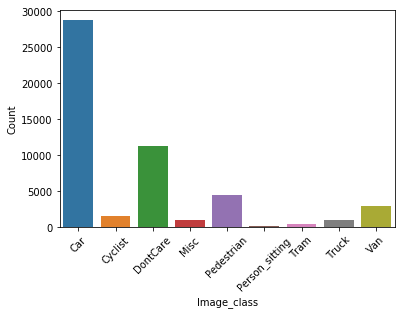

In [16]:
bplot = sns.barplot(x,y)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation=45)
bplot.set(ylabel = "Count")

In [17]:
occluded_img = label_df1.groupby('occluded', as_index=False ).count()
occluded_img

,occluded,Image_class,truncated,alpha,l_bbox,t_bbox,r_bbox,b_bbox,h(m),w(m),l(m),loc_x,loc_y,loc_z,rotation_y
0,-1,11295,11295,11295,11295,11295,11295,11295,11295,11295,11295,11295,11295,11295,11295
1,0,19180,19180,19180,19180,19180,19180,19180,19180,19180,19180,19180,19180,19180,19180
2,1,11087,11087,11087,11087,11087,11087,11087,11087,11087,11087,11087,11087,11087,11087
3,2,8101,8101,8101,8101,8101,8101,8101,8101,8101,8101,8101,8101,8101,8101
4,3,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198


In [18]:
label_df1[label_df1.occluded =='-1'].head()

,Image_class,truncated,occluded,alpha,l_bbox,t_bbox,r_bbox,b_bbox,h(m),w(m),l(m),loc_x,loc_y,loc_z,rotation_y
003436,DontCare,-1,-1,-10,51.57,171.48,110.09,256.51,-1,-1,-1,-1000,-1000,-1000,-10
003436,DontCare,-1,-1,-10,534.14,175.36,566.13,193.12,-1,-1,-1,-1000,-1000,-1000,-10
003436,DontCare,-1,-1,-10,615.00,172.12,674.81,193.11,-1,-1,-1,-1000,-1000,-1000,-10
003436,DontCare,-1,-1,-10,946.85,152.72,983.37,213.17,-1,-1,-1,-1000,-1000,-1000,-10
003436,DontCare,-1,-1,-10,1139.60,148.19,1239.98,168.54,-1,-1,-1,-1000,-1000,-1000,-10


Execute label_transform.py to transform data into 2 classes and convert labels from kitti to yolo format

In [2]:
filepath = Path('/home/aditya/yolov3/master/data/labels_kitti')

In [4]:
filecount = len(os.listdir(filepath))
filecount

7481

In [31]:
max_iterations = 7480

k = []
label_name = []
for x in list(filepath.glob('*.txt'))[:max_iterations]:
  k = parse_label_count(x.open().read())
  f = x.name.replace('.txt','')
  label_name += [f]*k 

print(len(label_name))

51861


In [32]:
max_iterations = 7480

label_df = []
for x in list(filepath.glob('*.txt'))[:max_iterations]:
  label_df += (parse_label_feature(x.open().read()))

print(len(label_df))

51861


In [35]:
label_df1 = pd.DataFrame(data = label_df, index = label_name )
label_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
003436,Vehicle,0.00,1,-2.71,154.99,189.05,338.18,256.17,1.44,1.52,3.50,-8.43,1.84,16.84,3.12
003436,Vehicle,0.00,2,-2.79,268.32,182.39,399.87,237.25,1.59,1.52,3.47,-8.48,1.91,22.26,3.13
003436,Vehicle,0.00,2,-2.81,306.48,179.90,424.68,227.75,1.58,1.55,3.59,-8.51,1.85,25.20,-3.13
003436,Vehicle,0.00,2,-2.83,356.23,177.17,463.23,219.42,1.71,1.69,4.06,-8.51,1.92,30.75,-3.10
003436,Vehicle,0.00,2,-2.99,419.45,180.61,483.50,211.20,1.66,1.62,3.34,-9.00,2.12,41.01,3.08


In [36]:
label_df1.columns = ['Image_class','truncated','occluded','alpha','l_bbox','t_bbox','r_bbox','b_bbox','h(m)','w(m)','l(m)','loc_x','loc_y','loc_z','rotation_y']
label_df1.head()

,Image_class,truncated,occluded,alpha,l_bbox,t_bbox,r_bbox,b_bbox,h(m),w(m),l(m),loc_x,loc_y,loc_z,rotation_y
003436,Vehicle,0.00,1,-2.71,154.99,189.05,338.18,256.17,1.44,1.52,3.50,-8.43,1.84,16.84,3.12
003436,Vehicle,0.00,2,-2.79,268.32,182.39,399.87,237.25,1.59,1.52,3.47,-8.48,1.91,22.26,3.13
003436,Vehicle,0.00,2,-2.81,306.48,179.90,424.68,227.75,1.58,1.55,3.59,-8.51,1.85,25.20,-3.13
003436,Vehicle,0.00,2,-2.83,356.23,177.17,463.23,219.42,1.71,1.69,4.06,-8.51,1.92,30.75,-3.10
003436,Vehicle,0.00,2,-2.99,419.45,180.61,483.50,211.20,1.66,1.62,3.34,-9.00,2.12,41.01,3.08


In [37]:
class_dist = label_df1.groupby('Image_class', as_index=False ).count()
class_dist.head()

,Image_class,truncated,occluded,alpha,l_bbox,t_bbox,r_bbox,b_bbox,h(m),w(m),l(m),loc_x,loc_y,loc_z,rotation_y
0,Non-Vehicle,18603,18603,18603,18603,18603,18603,18603,18603,18603,18603,18603,18603,18603,18603
1,Vehicle,33258,33258,33258,33258,33258,33258,33258,33258,33258,33258,33258,33258,33258,33258


In [39]:
x = class_dist.Image_class
y = class_dist.truncated

[Text(0, 0.5, 'Count')]

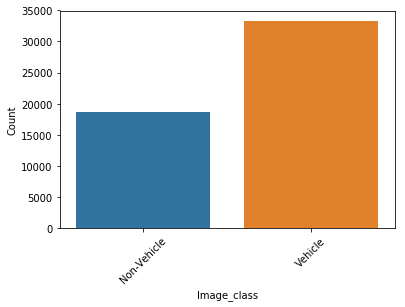

In [40]:
bplot = sns.barplot(x,y)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation=45)
bplot.set(ylabel = "Count")

In [5]:
filepath = Path('/home/aditya/yolov3/master/data/labels')

In [10]:
max_iterations = filecount

k = []
label_name = []
for x in list(filepath.glob('*.txt'))[:max_iterations]:
  k = parse_label_count(x.open().read())
  f = x.name.replace('.txt','')
  label_name += [f]*k 

print(len(label_name))

33261


In [11]:
max_iterations = filecount

label_df = []
for x in list(filepath.glob('*.txt'))[:max_iterations]:
  label_df += (parse_label_feature(x.open().read()))

print(len(label_df))

33261


In [44]:
label_df1 = pd.DataFrame(data = label_df, index = label_name )
label_df1.head()

,0,1,2,3,4
003436,1,0.19853864734299517,0.5936266666666667,0.14749597423510466,0.17898666666666668
003436,1,0.2689975845410628,0.55952,0.10591787439613527,0.14629333333333336
003436,1,0.29434782608695653,0.5435333333333333,0.09516908212560385,0.1276
003436,1,0.32989533011272143,0.5287866666666666,0.0861513687600644,0.11266666666666666
003436,1,0.3635064412238325,0.5224133333333333,0.05157004830917875,0.08157333333333326


In [45]:
label_df1.columns = ['Image_class','box_x','box_y','width','height']
label_df1.head()

,Image_class,box_x,box_y,width,height
003436,1,0.19853864734299517,0.5936266666666667,0.14749597423510466,0.17898666666666668
003436,1,0.2689975845410628,0.55952,0.10591787439613527,0.14629333333333336
003436,1,0.29434782608695653,0.5435333333333333,0.09516908212560385,0.1276
003436,1,0.32989533011272143,0.5287866666666666,0.0861513687600644,0.11266666666666666
003436,1,0.3635064412238325,0.5224133333333333,0.05157004830917875,0.08157333333333326


In [48]:
width = label_df1['width'].astype(float)
height = label_df1['height'].astype(float)

In [51]:
width.mean(),height.mean()

(0.0733684781636676, 0.16821379456341842)

In [52]:
CHANNEL_NUM = 3
pixel_num = 0 # store all pixel number in the dataset
channel_sum = np.zeros(CHANNEL_NUM)
channel_sum_squared = np.zeros(CHANNEL_NUM)

In [53]:
with open('/home/aditya/yolov3/master/pathtofile.txt') as f:
    pathlist = f.readlines()

In [54]:
for im_path in pathlist:
    path = im_path.strip()
    im = cv2.imread(path)
    im = im/255.0
    pixel_num += (im.size/CHANNEL_NUM)
    channel_sum += np.sum(im, axis=(0, 1))
    channel_sum_squared += np.sum(np.square(im), axis=(0, 1))

In [55]:
bgr_mean = channel_sum / pixel_num
bgr_std = np.sqrt(channel_sum_squared / pixel_num - np.square(bgr_mean))

In [56]:
rgb_mean = list(bgr_mean)[::-1]
rgb_std = list(bgr_std)[::-1]

print(rgb_mean, rgb_std)

[0.3680585591705839, 0.38735022264883884, 0.37600549391286525] [0.3158086400225011, 0.3201747450215384, 0.3259538020455303]
